# Data Visualization  


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#load dataset.
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')
#df.head()

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

ID                             ID
X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_1
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: 0, dtype: object


In [3]:
# Mostrar los datos despues de votar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Convertir a numérico.

In [5]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [6]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [7]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [8]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape


((27000, 39),
 (24000, 39),
 (3000, 39),
 (3000, 39),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

In [9]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)


# K-Nearest Neighbor(KNN)

### Entrenamiento del clasificador "sin re-escalamiento"

In [10]:
#iniciamos el clasificador con K = 5 para iniciar.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_entren, y_entren)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
#utilizamos el conjunto de validación para medir el score inicial.
print("KNN-k=5:")
knn.score(X_val,y_val)
#el score inicial es bueno, pero puede mejorarse.

KNN-k=5:


0.7426666666666667

In [12]:
#imprimirmos una muestra de las probabilidades de predicción.
knn.predict_proba(X_val)

array([[1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ]])

In [13]:
#mostrar las predicciones
y_predi = knn.predict(X_val)
y_predi

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
#imprimir el costo asociado
custom_cost(knn, X_val, y_val, printout=True)

Exactitud:     0.7426666666666667
Precisión:     0.35347432024169184
Exhaustividad: 0.17333333333333334
AUC:           0.5406451612903226
Costo por cliente: 0.9623333333333334


Quality(accuracy=0.7426666666666667, precision=0.35347432024169184, recall=0.17333333333333334, AUC=0.5406451612903226, cost=0.9623333333333334)

In [15]:
#matriz de confusion
y_actual = pd.Series(y_val, name = 'actual')
y_actual = y_actual.reset_index(drop=True) #para resetear.
y_pred = pd.Series(y_predi, name = 'prediction')
confusion_matrix = pd.crosstab(y_actual, y_pred)
confusion_matrix

prediction,0,1
actual,,
0,2111,214
1,558,117


In [25]:
#evaluación para los 20 primeros K utilizando el conjunto de test.

#almacenamiento del error.
error_knn = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entren, y_entren)
    k_score = knn.score(X_test,y_test)
    y_predi = knn.predict(X_test)
    print("KNN - Exactitud con K = " + str(k) + ":")
    print("------------------------------------------")
    print(k_score)
    print("_________________________________________")
    #almacenar el error.
    error_knn.append(np.mean(y_predi!=y_test))
    
    

KNN - Exactitud con K = 1:
------------------------------------------
0.713
_________________________________________
KNN - Exactitud con K = 2:
------------------------------------------
0.7766666666666666
_________________________________________
KNN - Exactitud con K = 3:
------------------------------------------
0.744
_________________________________________
KNN - Exactitud con K = 4:
------------------------------------------
0.773
_________________________________________
KNN - Exactitud con K = 5:
------------------------------------------
0.7583333333333333
_________________________________________
KNN - Exactitud con K = 6:
------------------------------------------
0.7763333333333333
_________________________________________
KNN - Exactitud con K = 7:
------------------------------------------
0.768
_________________________________________
KNN - Exactitud con K = 8:
------------------------------------------
0.782
_________________________________________
KNN - Exactitud c

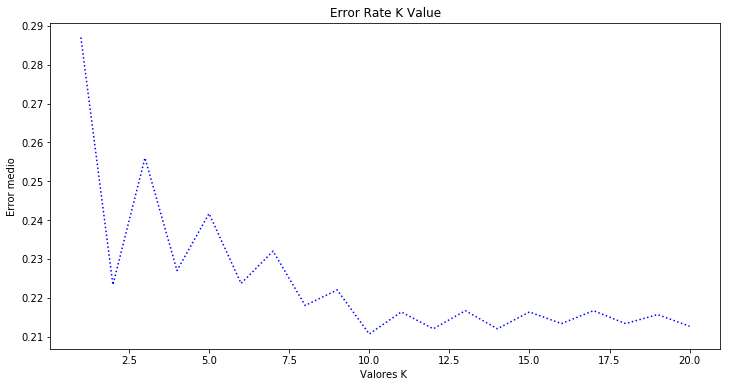

In [26]:
#imprimir el error.
y = plt.figure(figsize=(12,6))
plt.plot(range(1,21),error_knn,color = 'blue', linestyle='dotted',markerfacecolor='black',markersize=20)
plt.title('Error Rate K Value')
plt.xlabel('Valores K ')
plt.ylabel('Error medio')
plt.show()

### KNN con "Re-escalamiento"

In [28]:
#para evitar que los datos esten muy grandes, se procede a reescalar todos los valores y proceder a 
#realizar el calculo otra vez

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_entren)

# reescalamos X, y sigue siendo el mismo (1,0).
X_entren_s = scaler.transform(X_entren)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

# x_entrenamiento
X_entren


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
18387,30000,2,1,2,24,-2,-2,-2,-2,-2,...,0.000000,0.000000,0.024833,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
21537,30000,2,2,2,22,-1,2,2,2,2,...,0.391267,0.441833,0.479333,0.469367,0.359867,0.085193,0.150886,0.116134,0.039131,0.000000
5930,50000,2,3,1,54,0,0,0,0,0,...,0.324000,0.312440,0.285540,0.258600,0.233140,0.098025,0.094930,0.042796,0.035422,0.034572
24954,60000,1,2,2,30,0,0,0,0,0,...,0.094717,0.112217,0.127700,0.142150,0.164733,0.263945,0.193079,0.156617,0.117247,0.151760
14818,130000,1,3,2,28,-1,-1,-1,-1,-1,...,0.004615,0.000000,0.004854,0.000000,0.003285,1.000000,0.000000,1.000000,0.000000,1.000000
7694,290000,2,2,1,39,0,0,0,0,2,...,0.979397,0.960076,0.975979,0.980793,1.014245,0.042250,0.041663,0.044617,0.028126,0.056437
10353,360000,1,3,1,58,-1,-1,-1,-1,0,...,0.001539,0.003028,0.002167,0.001083,0.001078,1.000000,1.005505,1.000000,0.000000,1.000000
23374,140000,2,2,2,31,1,-2,-2,-1,-1,...,0.000000,0.000000,0.000543,0.000543,0.000543,0.000000,0.000000,1.000000,0.000000,0.000000
8305,300000,2,1,2,26,0,0,0,0,0,...,0.939063,0.947937,0.518540,0.528160,0.542087,0.042613,0.035709,0.038570,0.031556,0.036894


In [29]:
#volvemos a calcular.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_entren_s, y_entren)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
#utilizamos el conjunto de validación para medir el score inicial.
print("KNN-k=5 'escalado':")
knn.score(X_val_s,y_val)
#el score inicial es bueno, pero puede mejorarse.

KNN-k=5 'escalado':


0.7873333333333333

In [33]:
#imprimirmos una muestra de las probabilidades de predicción, pero con datos escalados.
knn.predict_proba(X_val_s)

array([[1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       ...,
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ]])

In [35]:
#mostrar las predicciones, datos escalados.
y_predi = knn.predict(X_val_s)
y_predi

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [36]:
#imprimir el costo asociado, datos escalados.
custom_cost(knn, X_val_s, y_val, printout=True)

Exactitud:     0.7873333333333333
Precisión:     0.548051948051948
Exhaustividad: 0.3125925925925926
AUC:           0.6188769414575865
Costo por cliente: 0.761


Quality(accuracy=0.7873333333333333, precision=0.548051948051948, recall=0.3125925925925926, AUC=0.6188769414575865, cost=0.761)

In [37]:
#matriz de confusion, datos escalados
y_actual = pd.Series(y_val, name = 'actual')
y_actual = y_actual.reset_index(drop=True) #para resetear.
y_pred = pd.Series(y_predi, name = 'prediction')
confusion_matrix = pd.crosstab(y_actual, y_pred)
confusion_matrix

prediction,0,1
actual,,
0,2151,174
1,464,211


In [39]:
#evaluación para los 20 primeros K utilizando el conjunto de test.

#almacenamiento del error.
error_knn2 = []

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entren_s, y_entren)
    k_score = knn.score(X_test_s,y_test)
    y_predi = knn.predict(X_test_s)
    print("KNN - Exactitud con K = " + str(k) + ":")
    print("------------------------------------------")
    print(k_score)
    print("_________________________________________")
    #almacenar el error.
    error_knn2.append(np.mean(y_predi!=y_test))
    
    

KNN - Exactitud con K = 1:
------------------------------------------
0.73
_________________________________________
KNN - Exactitud con K = 2:
------------------------------------------
0.793
_________________________________________
KNN - Exactitud con K = 3:
------------------------------------------
0.782
_________________________________________
KNN - Exactitud con K = 4:
------------------------------------------
0.7996666666666666
_________________________________________
KNN - Exactitud con K = 5:
------------------------------------------
0.7926666666666666
_________________________________________
KNN - Exactitud con K = 6:
------------------------------------------
0.8036666666666666
_________________________________________
KNN - Exactitud con K = 7:
------------------------------------------
0.7956666666666666
_________________________________________
KNN - Exactitud con K = 8:
------------------------------------------
0.8016666666666666
__________________________________

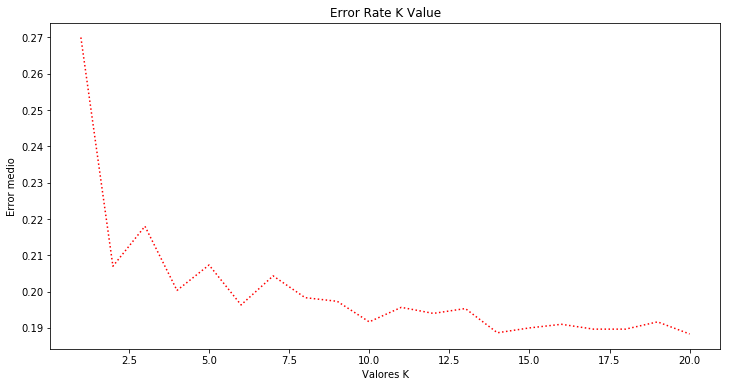

In [40]:
#imprimir el error.
y = plt.figure(figsize=(12,6))
plt.plot(range(1,21),error_knn2,color = 'red', linestyle='dotted',markerfacecolor='black',markersize=20)
plt.title('Error Rate K Value')
plt.xlabel('Valores K')
plt.ylabel('Error medio')
plt.show()

In [41]:
#conclusion KNN

print("- La exactitud con k=5 sin reescalamiento fue: 0.74 y con un costo de 0.96")
print("- La exactitud con k=5 con reescalamiento fue: 0.78 y con un costo de 0.76")
print("con reescalamiento mejora la exactitud y baja el costo.")
print("el mejor valor para K es 15, exactitud: 0.81")


- La exactitud con k=5 sin reescalamiento fue: 0.74 y con un costo de 0.96
- La exactitud con k=5 con reescalamiento fue: 0.78 y con un costo de 0.76
con reescalamiento mejora la exactitud y baja el costo.
el mejor valor para K es 15, exactitud: 0.81
